# Mudcard
- **should you ever remove a feature ? Or will it always be beneficial. I like to drop columns where 80% of the values are empty.**
    - I'd only drop unique IDs like the ID column in the house price dataset
    - I wouldn't drop a feature if 80% of values are empty
    - that remaining 20% could be helpful or the missingness might correlated with the target variable somehow
        - e.g. in classification, 90% of missing values are in class 0, and 10% are in class 1
        - e.g., in regression, the probability of a value missing correlates with the target variable (if the target variable is large, it is more likely the feature will be missing)
        - some ML techniques can learn these sort of things to improve predictive power
- **For continuous feature, can we use random number (which follows the distribution of existing values) to fill the missing values?**
    - I wouldn't 
    - let's assume the feature is some sort of test result which is performed on some patients but it is unnecessary for other patiens like measuring the concentration of certain platelets
    - would you feel comfortable randomly guessing what the platelet count is for patients without test?
- **Can you preform feature engineering on your target variable in order to create a new category for prediction?**
    - NO!!!
    - absolutely not
    - when you deploy the model and it is time to use it on previously unseen data, how would you determine that new category without knowing the target variable?
    - this would be a very bad case of information leakage
- **What is the difference between the feature selection approaches we covered at the end of class and using 'Stepwise regression' to identify informative features? Is the latter less flexible or useful in some cases?**
    - stepwise regression/classification is more powerful because you use an ML model to select features so feature interactions can be taken into account
    - the f test and the mutual info calculates how strongly each feature correlates with the target variable but it ignores feature interactions
    - we will cover a couple of techniques to select features using ML models like permutation feature importance, shap, Lasso or l1 regularization
- **"I am confused as to why the polynomialFeatures is useful, is it random added data?**
- **I understand why creating a feature like a x b is useful for capturing feature interactions, but what is the point of polynomial features like a^2, b^2, if already have a and b.**
    - if you use a linear model and sqrt(a) + noise = y, model performance will improve if you add a^2 because now a^2 and y will be linearly correlated
    - these are very handwavy arguments
    - as I said in class, automated feature engineering is rarely useful
- **Conceptually, the idea of transformations doesn't seem to add any new information to me but maybe that's because I don't understand how the algorithms fail to make those calculations on their own.**
    - you are correct, transformations don't add new info
    - it will help the ML model to converge faster though
    - read more [here](https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35)
- **Near the beginning of lecture when we talked about transforming the categorical, nominal, and numeric columns, I am confused on how we know what preprocessor.fit_transform and preprocessor.get_feature_names_out do**
    - check their manuals
- **If there is a relationship between more than 2 features, how will we find out because it is difficult to visualize data in higher dimensions.**
    - yes, that's difficult
    - you can maybe visualize three features in 3D but it's tough to go beyond that
- **will adding more features ever make the model worse?**
    - good question!
    - depends on the model
    - tree-based methods will not get worse if you add uninformative features but k nearest neightbors will
    - once we cover ML algorithms, you could create a toy dataset, add uninformative features and study this effect
- **If the feature selection that we covered today happens before data splitting, why are you teaching it after data splitting? I guess it is because it is a relatively not-important topic?**
    - yeah
    - automated feature engineering and feature selection without an ML model are short topics you might or might not need in the future
    - it doesn't hurt to at least hear about them but they are not really all that useful in practice
- **if the degree were to increase, is it just like multiplying everything out as if it were algebra? so three integers its a*a*a but two degrees is just a*a and would there still be a*a in 3 degrees?**
    - run the code and check it yourself! :)
- **Do time series data require feature engineering?**
    - yes, autoregression is basically feature engineering for time series data
- **Could more advanced statistical methods be applied to the dataset and then added as a new feature? Or should we stick to basic calculations for the new features?**
    - you can create any feature you'd like
- **As mentioned in class, we are doing feature engineering after we choose a model. How do we know what is the best feature-model combo? What if the feature we engineered can achieve better performance on other models?**
    - always check the generalization error, the test score
    - it is a good idea to engineer one feature and run it through multiple models and check which model is the best
- **I understand the value of adding features and not preemptively taking them out before modelling. However, doesn't adding too many features also run the risk of overfitting and making the model less generalizable to datasets that aren't coded exactly the same way?**
    - overfitting is avoided with cross-validation and measuring the bias-variance trade-off
    - classical supervised ML models almost never generalize to other datasets/projects
    - your model will be specific to the dataset you trained it on
- **Would feature engineering also entail filling in missing values based on other datasets. For example, if we had weather data, could we use the weather from the year prior to help fill in values?**
    - no, it's not feature engineering because you don't create a new feature
    - and no, I wouldn't use values from a year ago to fill in the dataset
    - generally I'm not a big fan of imputation
    - I'll cover one state of the art imputation technique that I'm OK with if used properly
    - and I'll show two methods to handle missing values without imputation
- **How does training a machine learning model before doing feature selection help in identifying feature interactions?**
    - we will learn about feature importance metrics that can measure how important feature pairs are at predicting the target variable
- **Do data reduction techniques fall under the category of feature engineering?**
    - no, that's feature selection
- **Is multivariate imputation only used for continuous variables?**
    - yep
    - you can preprocess missing values in categorical and ordinal features easily without imputation
- **Do we have to plot the relationships between every combination of two features to make sure we did not miss any feature interactions?**
    - yes, alternatively see PS5, problem 3
- **Will we need to do feature selection in our projects?**
    - up to you

## Evaluation metrics in supervised ML, part 1, classification
By the end of this lecture, you will be able to
- Describe the terms in the confusion matrix
- Summarize and compare derived metrics (e.g., accuracy, recall, precision, f score)
- Choose a metric most appropriate for your problem


## The supervised ML pipeline
The goal: Use the training data (X and y) to develop a <font color='red'>model</font> which can <font color='red'>accurately</font> predict the target variable (y_new') for previously unseen data (X_new).

**1. Exploratory Data Analysis (EDA)**: you need to understand your data and verify that it doesn't contain errors
   - do as much EDA as you can!
    
**2. Split the data into different sets**: most often the sets are train, validation, and test (or holdout)
   - practitioners often make errors in this step!
   - you can split the data randomly, based on groups, based on time, or any other non-standard way if necessary to answer your ML question

**3. Preprocess the data**: ML models only work if X and Y are numbers! Some ML models additionally require each feature to have 0 mean and 1 standard deviation (standardized features)
   - often the original features you get contain strings (for example a gender feature would contain 'male', 'female', 'non-binary', 'unknown') which needs to transformed into numbers
   - often the features are not standardized (e.g., age is between 0 and 100) but it needs to be standardized
    
<span style="background-color: #FFFF00">**4. Choose an evaluation metric**: depends on the priorities of the stakeholders</span>
   - often requires quite a bit of thinking and ethical considerations
     
**5. Choose one or more ML techniques**: it is highly recommended that you try multiple models
   - start with simple models like linear or logistic regression
   - try also more complex models like nearest neighbors, support vector machines, random forest, etc.
    
**6. Tune the hyperparameters of your ML models (aka cross-validation)**
   - ML techniques have hyperparameters that you need to optimize to achieve best performance
   - for each ML model, decide which parameters to tune and what values to try
   - loop through each parameter combination
       - train one model for each parameter combination
       - evaluate how well the model performs on the validation set
   - take the parameter combo that gives the best validation score
   - evaluate that model on the test set to report how well the model is expected to perform on previously unseen data
    
**7. Interpret your model**: black boxes are often not useful
   - check if your model uses features that make sense (excellent tool for debugging)
   - often model predictions are not enough, you need to be able to explain how the model arrived to a particular prediction (e.g., in health care)

## Let's start
- decide what metric we will use to evaluate the supervised ML model 
   - this is necessary even before we train the model
   - we need to know what single number metric we will use to compare models and to select the best one
- sklearn classifiers have two methods to return predictions
   - .predict_proba which returns the probability that the point belongs to each class with shape (n_samples, n_classes)
   - .predict which returns the predicted class for each point with shape (n_samples)

### .predict_proba vs. .predict

`y_true = [1 0 1 1 0] # the true labels`

`pred_probs = 
[[0.02796171 0.97203829]
 [0.89682444 0.10317556]
 [0.50104129 0.49895871]
 [0.13713222 0.86286778]
 [0.95707434 0.04292566]] # predicted probabilities show the model's confidence`
 
 `y_pred = [1 0 0 1 0] # predicted class`
 - pred_probs
    - first column is the probability that the point belongs to class 0
    - second column is the probability that the point belings to class 1
    - the rows sum to 1
 - y_pred
    - 0 if class 0 probability is equal or larger than 50% (or equivalently if class 1 probability is less than 50%)
    - 1 if class 0 probability is less than 50% (or equivalently of class 1 probability is equal or larger than 50%)

### How to transform predicted probabilities to predicted class?

In [1]:
import numpy as np
y_true = np.array([0,0,1,0,1,1,0,1,0,1]) # the true classification labels of the dataset
# pred_probs_class1 is the second column of pred_probs
pred_probs_class1 = np.array([0.3, 0.7,  0.55, 0.12, 0.45, 0.89, 0.41, 0.02, 0.29, 0.85])
p_crit =  0.5

# If predicted probability is < p_crit (by default 0.5), predicted class is 0, otherwise it is 1.
y_pred = np.zeros(len(pred_probs_class1),dtype=int)
y_pred[pred_probs_class1 < p_crit] = 0
y_pred[pred_probs_class1 >= p_crit] = 1

print(y_true)
print(y_pred) # the predicted classification labels

[0 0 1 0 1 1 0 1 0 1]
[0 1 1 0 0 1 0 0 0 1]


For now, we focus on evaluation metrics applicable to predicted classes!

We work with y_true and y_pred arrays.

Next, we will work with metrics applicable to pred_probs and regression problems.

## <font color='LIGHTGRAY'>Evaluation metrics in supervised ML, part 1, classification</font>
<font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- **Describe the terms in the confusion matrix**
- <font color='LIGHTGRAY'>Summarize and compare derived metrics (e.g., accuracy, recall, precision, f score)</font>
- <font color='LIGHTGRAY'>Choose a metric most appropriate for your problem</font>


## The confusion matrix

`y_true = [0, 0, 1, 0, 1, 1, 0, 1, 0, 1] # the true classification labels of the dataset`

`y_pred = [0, 1, 1, 0, 0, 1, 0, 0, 0, 1] # the predicted classification labels`

Let's count how many points we have in four categories:

- true label is 0, predicted label is 0 - **True Negatives**
- true label is 1, predicted label is 1 - **True Positives**
- true label is 0, predicted label is 1 - **False Positive**
- true label is 1, predicted label is 0 - **False Negative**

Generally, the confusion matrix $C$ is such that $C_{i,j}$ is equal to the number of observations known to be in group $i$ but predicted to be in group $j$.

## Back to our example:

`y_true = [0, 0, 1, 0, 1, 1, 0, 1, 0, 1] # the true classification labels of the dataset`

`y_pred = [0, 1, 1, 0, 0, 1, 0, 0, 0, 1] # the predicted classification labels`


<table>
    <tr>
        <td colspan="2" rowspan="2"></td>
        <td colspan="2">Predicted class</td>			
    </tr>
    <tr>
        <td>Predicted Negative (0)</td>
        <td>Predicted Positive (1)</td>
    </tr>
    <tr>
        <td rowspan="2">Actual class</td>
        <td>Condition Negative (0)</td>
        <td><b>True Negative (TN): 4</b></td>
        <td><b>False Positive (FP): 1</b></td>
    </tr>
    <tr>
        <td>Condition Positive (1)</td>
        <td><b>False Negative (FN): 2</b></td>
        <td><b>True Positive (TP): 3</b></td>
    </tr>
</table>


## In sklearn

In [2]:
from sklearn.metrics import confusion_matrix

y_true = [0,0,1,0,1,1,0,1,0,1]
y_pred = [0,1,1,0,0,1,0,0,0,1]
print(confusion_matrix(y_true,y_pred))

[[4 1]
 [2 3]]


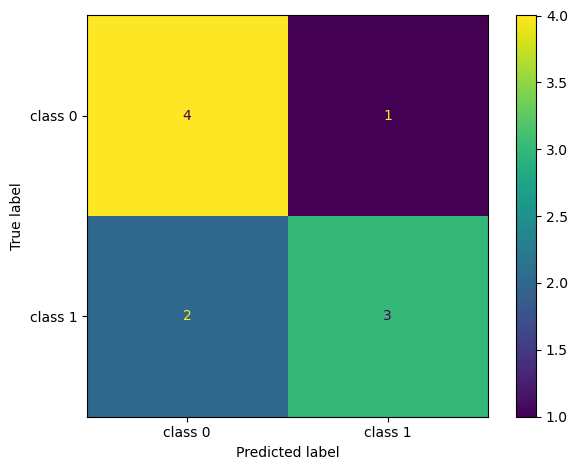

In [3]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay
# check out also https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_true,y_pred)
disp = ConfusionMatrixDisplay(cm,display_labels=['class 0', 'class 1'])
disp.plot()
plt.tight_layout()
plt.show()


## Quiz 1

Calculate what fraction of the data points are correctly classified in the example below. Visualize the confusion matrix (not part of the quiz)!

In [4]:
y_true = np.array([0,0,2,1,1,0,2,2,2,0,1,1,0,0,0,1])
y_pred = np.array([0,1,0,1,0,0,2,2,1,0,1,1,0,0,1,2])

# add you code below



## <font color='LIGHTGRAY'>Evaluation metrics in supervised ML, part 1, classification</font>
<font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- <font color='LIGHTGRAY'>Describe the terms in the confusion matrix</font>
- **Summarize and compare derived metrics (e.g., accuracy, recall, precision, f score)**
- <font color='LIGHTGRAY'>Choose a metric most appropriate for your problem</font>


## Metrics derived from $C$
$C$ contains $n_{classes}^2$ elements but we need a single number metric to easily compare various models.

For two classes:


<table>
    <tr>
        <td colspan="2" rowspan="2"></td>
        <td colspan="2">Predicted class</td>			
    </tr>
    <tr>
        <td>Predicted Negative (0)</td>
        <td>Predicted Positive (1)</td>
    </tr>
    <tr>
        <td rowspan="2">Actual class</td>
        <td>Condition Negative (0)</td>
        <td><b>True Negative (TN)</b></td>
        <td><b>False Positive (FP)</b></td>
    </tr>
    <tr>
        <td>Condition Positive (1)</td>
        <td><b>False Negative (FN)</b></td>
        <td><b>True Positive (TP)</b></td>
    </tr>
</table>


Some single number metrics derived from $C$:
- accuracy: fraction of data points correctly classified
   - $a = \sum_i C_{i,i} / \sum C$ = (TP + TN) / (TP + TN + FP + FN)
- recall: what fraction of the condition positive samples are true positives?
   - it measures the ability of the classifier to identify all positive samples
   - in binary classification: R = TP / (TP + FN)
- precision: what fraction of the predicted positive points are true positives?
   - it measures the ability of the classifier to not predict a negative sample to be positive
   - in binary classification: P = TP / (TP + FP)

<table>
    <tr>
        <td colspan="2" rowspan="2"></td>
        <td colspan="2">Predicted class</td>			
    </tr>
    <tr>
        <td>Predicted Negative (0)</td>
        <td>Predicted Positive (1)</td>
    </tr>
    <tr>
        <td rowspan="2">Actual class</td>
        <td>Condition Negative (0)</td>
        <td><b>True Negative (TN)</b></td>
        <td><b>False Positive (FP)</b></td>
    </tr>
    <tr>
        <td>Condition Positive (1)</td>
        <td><b>False Negative (FN)</b></td>
        <td><b>True Positive (TP)</b></td>
    </tr>
</table>

A = (TP + TN) / (TP + TN + FP + FN) 

R = TP / (TP + FN) = TP / CP

P = TP / (TP + FP) = TP / PP

### The f_beta score
Weighted harmonic mean of P and R:
### <center> $f_{\beta} = (1 + \beta^2) \frac{P R}{\beta^2 P + R}$ </center>

If $\beta = 1$, we have the f1 score:
### <center> $f_{1} = 2 \frac{P R}{P + R}$ </center>

If $\beta < 1$, more weight to precision.

If $\beta > 1$, more weight to recall.



### The scores are a function of p_crit

In [5]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, fbeta_score

y_true = np.array([0,0,1,0,1,1,0,1,0,1]) # the true classification labels of the dataset
y_pred_proba = np.array([0.3, 0.7,  0.55, 0.12, 0.45, 0.89, 0.41, 0.02, 0.29, 0.85])

p_crit = 0.5

y_pred = np.zeros(len(y_pred_proba),dtype=int)
y_pred[y_pred_proba < p_crit] = 0
y_pred[y_pred_proba >= p_crit] = 1

print(y_true)
print(y_pred) # the predicted classification labels
print('accuracy',accuracy_score(y_true,y_pred))
print('recall',recall_score(y_true,y_pred))
print('precision',precision_score(y_true,y_pred))
print('f1',fbeta_score(y_true,y_pred,beta=1))

[0 0 1 0 1 1 0 1 0 1]
[0 1 1 0 0 1 0 0 0 1]
accuracy 0.7
recall 0.6
precision 0.75
f1 0.6666666666666665


## Quiz 2
Given the true and predicted labels, what are the accuracy, recall, precision, and f1 scores? 

Do not use sklearn to answer the question! First construct the confusion matrix and then calculate the scores by hand!

In [6]:
y_true = [0,0,0,1,1,1,0,0]
y_pred = [0,1,0,1,1,0,0,0]



## <font color='LIGHTGRAY'>Evaluation metrics in supervised ML, part 1, classification</font>
<font color='LIGHTGRAY'>By the end of this lecture, you will be able to</font>
- <font color='LIGHTGRAY'>Describe the terms in the confusion matrix</font>
- <font color='LIGHTGRAY'>Summarize and compare derived metrics (e.g., accuracy, recall, precision, f score)</font>
- **Choose a metric most appropriate for your problem**


## How should you choose a metric?

- What are the terms in the confusion matrix that you most (or least) care about?
    - In an imbalanced dataset, TNs are large so you should use a metric that doesn't include TN
    - no accuracy
    - f score is usually preferred if your dataset is imbalanced
- Will we act (intervene/apply treatment) on the model's prediction?
    - Is it cheap to act? (e.g., mass email)
       - we want to capture the largest fraction of the condition positive samples even if FPs will be large as a result
       - recall or fbeta with beta > 1 (f1.5 or f2 are often used)
    - Is it expensive to act? Do we have limited resources? Or treatment/action is costly?
       - we want to make sure that the resources are allocated the best way possible
       - want to make sure that a large fraction of the predicted positives are  true positives
       - precision or fbeta with beta < 1 (f0.5 is often used)

## Mudcard